## Multi-layer Perceptron ##

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learn a function f(.) = R^m -> R^o by trainnig on datasets, where  m is the number of dimensions for input and  o is the number of dimensions for output .Given a set of features X = x1,x2,x3......xm and a target y, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. Figure 1 shows a one hidden layer MLP with scalar output.

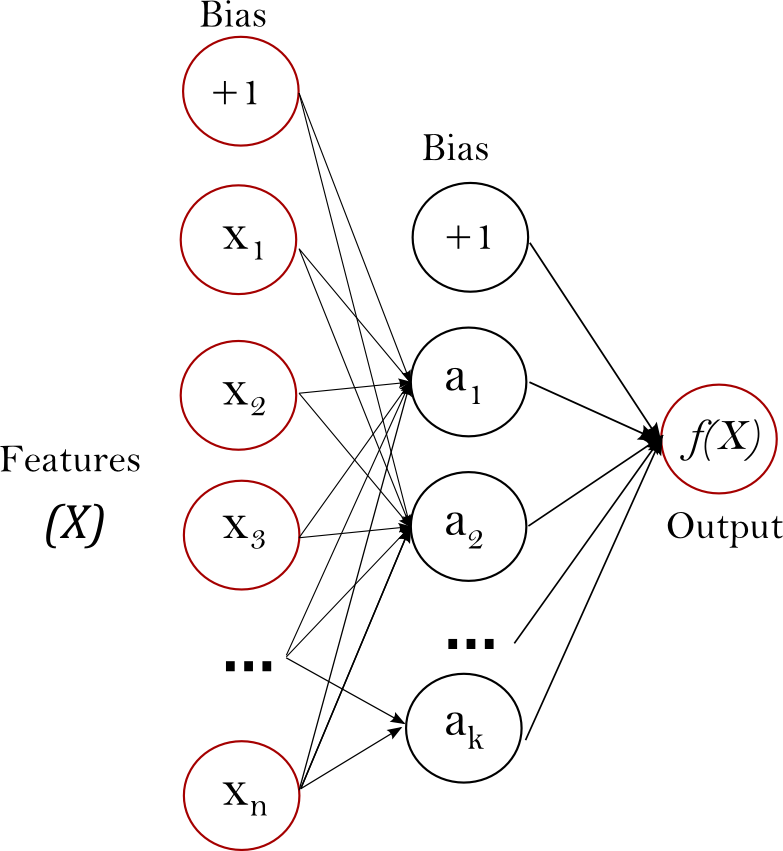


The leftmost layer, known as the input layer, consists of a set of neurons {x1| x1,x2,x3....xm}
 representing the input features. Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation w1x1+w2x2+w3x3+......+wmxm, followed by a non-linear activation function G(.)= R -> R - like the hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

The module contains the public attributes coefs_ and intercepts_. coefs_ is a list of weight matrices, where weight matrix at index i represents the weights between layer i and i+1 layer . intercepts_ is a list of bias vectors, where the vector at index  represents the bias values added to layer .


#### The advantages of Multi-layer Perceptron are:
    Capability to learn non-linear models.
    Capability to learn models in real-time (on-line learning) using partial_fit.

#### The disadvantages of Multi-layer Perceptron (MLP) include:

     MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.

    MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.

    MLP is sensitive to feature scaling.



### Classification ###

Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.

MLP trains on two arrays: array X of size (n_samples, n_features), which holds the training samples represented as floating point feature vectors; and array y of size (n_samples,), which holds the target values (class labels) for the training samples

In [2]:
from sklearn.neural_network import MLPClassifier

X = [[0,0],[1,1]]
Y = [0,1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, Y)
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

In [3]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 1)]

Currently, MLPClassifier supports only the Cross-Entropy loss function, which allows probability estimates by running the predict_proba method.

MLP trains using Backpropagation. More precisely, it trains using some form of gradient descent and the gradients are calculated using Backpropagation. For classification, it minimizes the Cross-Entropy loss function, giving a vector of probability estimates p(y/x) per sample x :

In [4]:
clf.predict_proba([[2., 2.], [1., 2.]])

array([[1.96718015e-04, 9.99803282e-01],
       [1.96718015e-04, 9.99803282e-01]])

MLPClassifier supports multi-class classification by applying Softmax as the output function.

Further, the model supports multi-label classification in which a sample can belong to more than one class. For each class, the raw output passes through the logistic function. Values larger or equal to 0.5 are rounded to 1, otherwise to 0. For a predicted output of a sample, the indices where the value is 1 represents the assigned classes of that sample:

In [5]:
X = [[0., 0.], [1., 1.]]
y = [[0, 1], [1, 1]]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)

clf.fit(X, y)


clf.predict([[1., 2.]])

clf.predict([[0., 0.]])

array([[0, 1]])

## Regression ##

Class MLPRegressor implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer, which can also be seen as using the identity function as activation function. Therefore, it uses the square error as the loss function, and the output is a set of continuous values.

MLPRegressor also supports multi-output regression, in which a sample can have more than one target.

## Regularization ##
Both MLPRegressor and MLPClassifier use parameter alpha for regularization (L2 regularization) term which helps in avoiding overfitting by penalizing weights with large magnitudes. Following plot displays varying decision function with value of alpha.

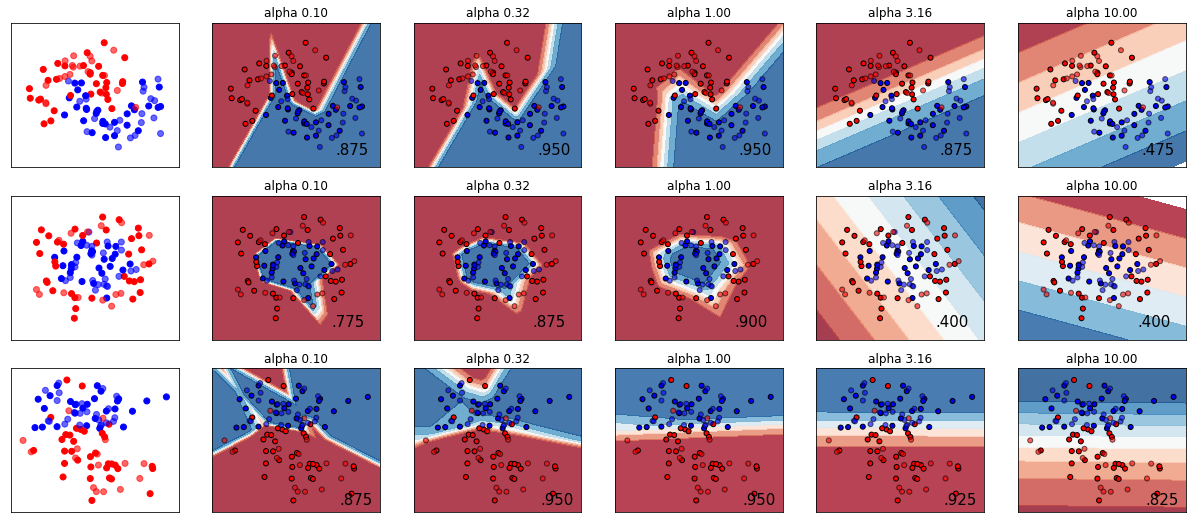

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

h = 0.02  # step size in the mesh

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            MLPClassifier(
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 10],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
        else:
            Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot also the training points
        ax.scatter(
            X_train[:, 0],
            X_train[:, 1],
            c=y_train,
            cmap=cm_bright,
            edgecolors="black",
            s=25,
        )
        # and testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            alpha=0.6,
            edgecolors="black",
            s=25,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            f"{score:.3f}".lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()

## Complexity: ##

Suppose there are  n training samples, m features, k hidden layers, each containing h neurons - for simplicity, and o output neurons. The time complexity of backpropagation is 
### O(n.m.h^k.o.i),
where i is the number of iterations. Since backpropagation has a high time complexity, it is advisable to start with smaller number of hidden neurons and few hidden layers for training.


## Tips on Practical Use ##

=> Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], or standardize it to have mean 0 and variance 1. Note that you must apply the same scaling to the test set for meaningful results. You can use StandardScaler for standardization.

In [9]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)

In alternative and recommended approach is to use StandardScaler in a Pipeline

=> Finding a reasonable regularization parameter Alpha is best done using GridSearchCV, usually in the range 10.0 ** -np.arange(1, 7).

=> Empirically, we observed that L-BFGS converges faster and with better solutions on small datasets. For relatively large datasets, however, Adam is very robust. It usually converges quickly and gives pretty good performance. SGD with momentum or nesterov’s momentum, on the other hand, can perform better than those two algorithms if learning rate is correctly tuned.